In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import collections
import copy
import concurrent.futures
from itertools import groupby, islice
from collections import Counter


### 1.4

In [2]:
def K_neighborhood(node):
    return 0
def reverse_K_neighborhood(node):
    return 0

In [4]:
# def find_strongly_connected_component(graph_nodes_list, nodes_list):
#     nodes_list.append(K_neighborhood(graph_nodes_list))
#     nodes_list.append(reverse_K_neighborhood(graph_nodes_list)) 
#     return find_strongly_connected_component(graph_nodes_list, nodes_list)

# node_list = []
# all_nodes_list = find_strongly_connected_component(S.nodes(), node_list)
# if S.nodes() <= all_nodes_list:
#     print("The nodes set S is a strongly_connected_component")

### 2.1

In [29]:
Gl = nx.read_adjlist("large.tsv", create_using=nx.DiGraph())
Gm = nx.read_adjlist("medium.tsv", create_using=nx.DiGraph())
print('large Network:', Gl.number_of_edges())
print('medium Network:', Gm.number_of_edges())

large Network: 511718
medium Network: 13294


In [396]:
# nx.k_nearest_neighbors(Gm)

### 2.2

In [7]:
print('large Network:', Gl.number_of_nodes())
print('medium Network:', Gm.number_of_nodes())

large Network: 21461
medium Network: 928


### 2.3

In [30]:
def show_degree_plot(G_degree_counts, plotName, size):
    deg, cnt = G_degree_counts, len(G_degree_counts)
    list_x = [*range(0, cnt, 1)]
    plt.figure(figsize=(size[0], size[1]))
    plt.bar(list_x, deg, width=1, color='b')
    plt.title(plotName)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    return 

In [31]:
def get_degree_counts_list(G, degree_type):
    if degree_type == 'indegree':
        counts = Counter(d for n, d in G.in_degree())
    else:
        counts = Counter(d for n, d in G.out_degree())
    return [counts.get(i, 0) for i in range(max(counts) + 1)]

In [40]:
# none zero hist
# deg, cnt = Gl_indegree_counts[0:500], len(Gl_indegree_counts[0:500])
def none_zero_hist(G_degree, plotName, size):
    deg, cnt = G_degree, len(G_degree)
    list_x = [*range(0, cnt, 1)]

    degc = []
    for i in list_x:
        # print(deg[i])
        if deg[i] != 0:
            degc.append(deg[i])
            
    list_x = [*range(0, len(degc), 1)]
    plt.figure(figsize=(size[0], size[1]))
    plt.bar(list_x, degc, width=1, color='b')
    plt.title(plotName)
    plt.set_xlabels()
    plt.ylabel("Count")
    plt.xlabel("Degree")

    plt.show()

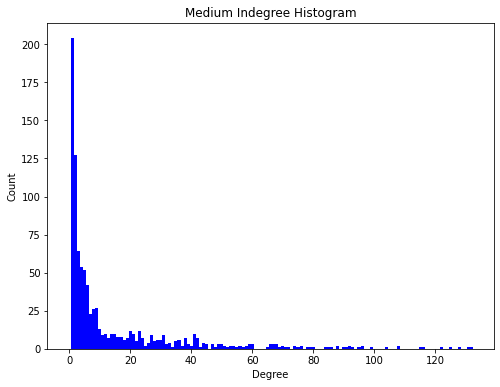

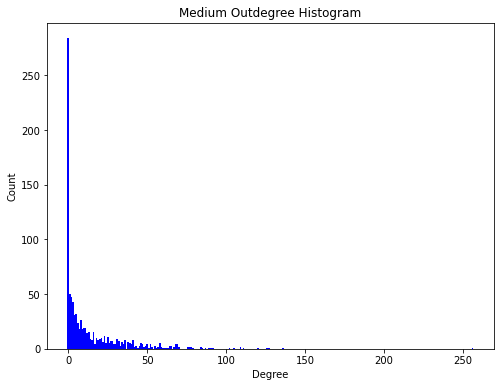

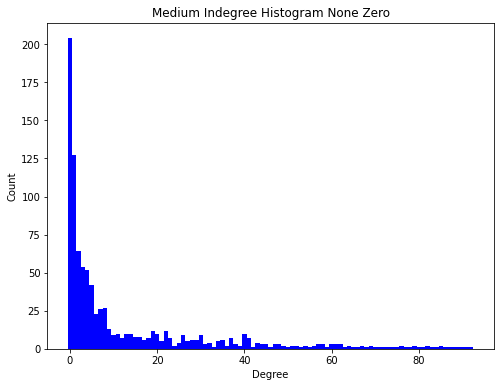

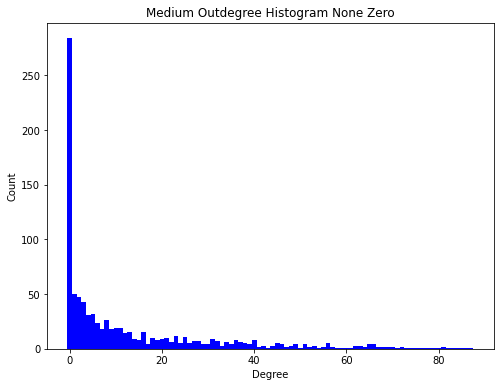

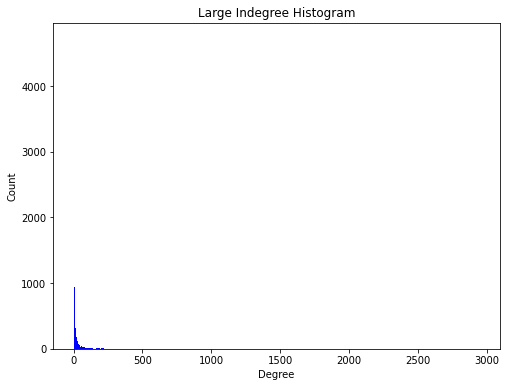

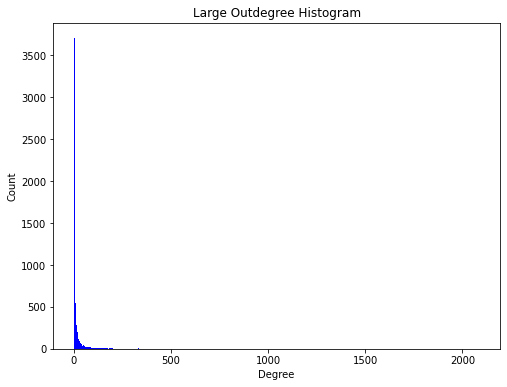

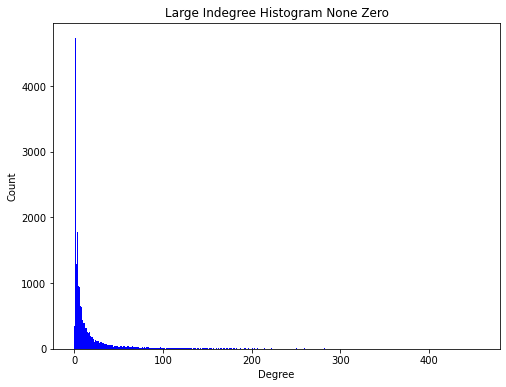

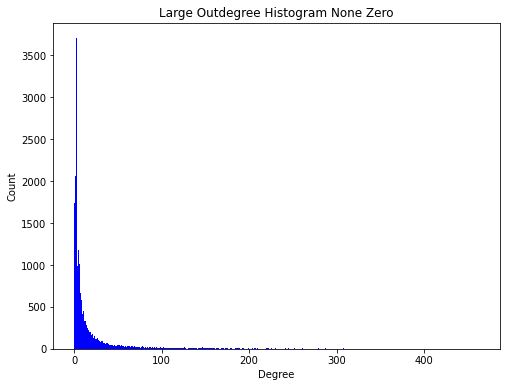

In [44]:
# medium network
Gm_indegree_counts = get_degree_counts_list(Gm, 'indegree')
Gm_outdegree_counts = get_degree_counts_list(Gm, 'outdegree')
show_degree_plot(Gm_indegree_counts, 'Medium Indegree Histogram', [8,6])
show_degree_plot(Gm_outdegree_counts, 'Medium Outdegree Histogram', [8,6])
none_zero_hist(Gm_indegree_counts, 'Medium Indegree Histogram None Zero', [8,6])
none_zero_hist(Gm_outdegree_counts, 'Medium Outdegree Histogram None Zero', [8,6])

# large network
Gl_indegree_counts = get_degree_counts_list(Gl, 'indegree')
Gl_outdegree_counts = get_degree_counts_list(Gl, 'outdegree')
show_degree_plot(Gl_indegree_counts, 'Large Indegree Histogram', [8,6])
show_degree_plot(Gl_outdegree_counts, 'Large Outdegree Histogram', [8,6])
none_zero_hist(Gl_indegree_counts, 'Large Indegree Histogram None Zero', [8,6])
none_zero_hist(Gl_outdegree_counts, 'Large Outdegree Histogram None Zero', [8,6])


### 2.4

In [324]:
def count_nodes(G, Gtype):
    subGraph = []
    count_nodes = 0
    count_edges = 0
    if Gtype == 'strongly':
        Gc = max(nx.strongly_connected_components(G), key=len)
        count_component = nx.number_strongly_connected_components(G)
    else:
        Gc = max(nx.weakly_connected_components(G), key=len)
        count_component = nx.number_weakly_connected_components(G)
    g = G.subgraph(Gc)
    return [count_component, g.number_of_nodes(), g.number_of_edges()]

In [325]:
Gm_s_n, Gm_s_nodes, Gm_s_edges = count_nodes(Gm, "strongly")
Gm_w_n, Gm_w_nodes, Gm_w_edges = count_nodes(Gm, "weakly")
Gl_s_n, Gl_s_nodes, Gl_s_edges = count_nodes(Gl, "strongly")
Gl_w_n, Gl_w_nodes, Gl_w_edges = count_nodes(Gl, "weakly")

In [326]:
print("number of strongly connected components in medium network: ", Gm_s_n, "nodes: ", Gm_s_nodes, "edges: ", Gm_s_edges)
print("number of weakly connected components in medium network: ", Gm_w_n, "nodes: ", Gm_w_nodes, "edges: ", Gm_w_edges)
print("number of strongly connected components in large network: ", Gl_s_n, "nodes: ", Gl_s_nodes, "edges: ", Gl_s_edges)
print("number of weakly connected components in large network: ", Gl_w_n, "nodes: ", Gl_w_nodes, "edges: ", Gl_w_edges)

number of strongly connected components in medium network:  305 nodes:  623 edges:  10512
number of weakly connected components in medium network:  1 nodes:  928 edges:  13294
number of strongly connected components in large network:  2154 nodes:  19299 edges:  505153
number of weakly connected components in large network:  14 nodes:  21434 edges:  511700


### 2.5

In [13]:
print(nx.average_clustering(Gm))
print(nx.average_clustering(Gl))

0.21287579609762455
0.38135345230825596


### 2.6

In [3]:
largest_w_m = max(nx.weakly_connected_components(Gm),key=len)
largest_w_l = max(nx.weakly_connected_components(Gl),key=len)

In [4]:
from turtle import distance


def show_distance_plot(G, componet):
    G_spl = G.subgraph(componet)
    spl = dict(nx.all_pairs_shortest_path_length(G_spl))
    distance_list = []
    sql_num = -1
    for node in spl:
        distance_list.extend(list(spl[node].values()))
    distance_number = []
    ini = -1
    for i in sorted(distance_list):
        if i == ini:
            continue
        ini = i
        distance_number.append(distance_list.count(i))
    plt.bar(range(0, len(distance_number), 1),distance_number, width=0.65, color='b')
    print(distance_number)
    plt.title("Distance distribution in Medium Network")
    plt.ylabel("frequency")
    plt.xlabel("distance")
    plt.show()
    return

[928, 13292, 114722, 194583, 165072, 70300, 14149, 4730, 678, 25]


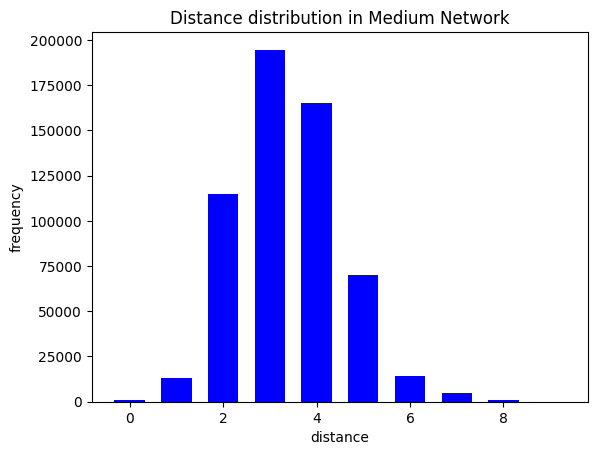

In [395]:
show_distance_plot(Gm, largest_w_m)
# show_distance_plot(Gl, largest_w_l)

### 2.7